In [2]:
import mne
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter


# Reading EEG data
1. Preprocesed Data `/local_raid3/03_user/myyu/EEG-fMRI/hackathon_eeg`
2. Raw Data `/local_raid3/03_user/myyu/EEG-fMRI/prep-obs_pc1`

## Preprocesed Data
1. .fif
- f"sub-{subject_id}_run{run_n}_stim_icaRej-epo.fif"
- stim(stimulate)

In [3]:
# read data
processed_data_dir = Path("/local_raid3/03_user/myyu/EEG-fMRI/hackathon_eeg")
processed_subject_ids = os.listdir(processed_data_dir)

run_ns = ["01", "02", "03", "04", "05", "06", "07", "08", "09"]


processed_data_all = []  # structure: [subject][run] = (X, y)

for subject_id in processed_subject_ids:
    subject_data = []  # list of (X, y) for this subject

    for run_n in run_ns:
        file_path = processed_data_dir / f"{subject_id}" / "TRI" / "epochs_data" / f"{subject_id}_run{run_n}_stim_icaRej-epo.fif"

        epochs = mne.read_epochs(file_path, preload=True)
        X = epochs.get_data()         # shape: (n_trials, n_channels, n_times)
        y = epochs.events[:, 2]       # shape: (n_trials,)
        

        subject_data.append((X, y))   # (X, y) tuple

    processed_data_all.append(subject_data)

Reading /local_raid3/03_user/myyu/EEG-fMRI/hackathon_eeg/sub-58/TRI/epochs_data/sub-58_run01_stim_icaRej-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 57) active
    Found the data of interest:
        t =    -200.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
83 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /local_raid3/03_user/myyu/EEG-fMRI/hackathon_eeg/sub-58/TRI/epochs_data/sub-58_run02_stim_icaRej-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 57) active
    Found the data of interest:
        t =    -200.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
81 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /local_raid3/03_user/myyu/EEG-fMRI/hac

In [4]:
epochs = mne.read_epochs(file_path, preload=True)

X = epochs.get_data()
y = epochs.events[:, 2]

print("EEG channels:", len(mne.pick_types(epochs.info, eeg=True)))
print("All channels :", epochs.info['nchan'])
print("X shape:", X.shape)

# event code and freq
import numpy as np
vals, cnts = np.unique(y, return_counts=True)
print("event codes:", dict(zip(vals, cnts)))

# 1/5 sampling check
n_trials = X.shape[0]
n_keep = int(n_trials * 0.2)
idx = np.random.choice(n_trials, size=n_keep, replace=False)
print("subset shape should be:", (n_keep, X.shape[1], X.shape[2]))

Reading /local_raid3/03_user/myyu/EEG-fMRI/hackathon_eeg/sub-59/TRI/epochs_data/sub-59_run09_stim_icaRej-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 57) active
    Found the data of interest:
        t =    -200.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
70 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
EEG channels: 57
All channels : 57
X shape: (70, 57, 451)
event codes: {2: 15, 3: 15, 4: 13, 5: 15, 6: 12}
subset shape should be: (14, 57, 451)


In [5]:
print(epochs.info)

<Info | 11 non-empty values
 bads: []
 ch_names: F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, P8, Fz, Cz, ...
 chs: 57 EEG
 custom_ref_applied: False
 dig: 68 items (3 Cardinal, 65 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 40.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 57
 projs: Average EEG reference: on
 sfreq: 500.0 Hz
>


In [6]:
ch_names = epochs.info["ch_names"]

In [7]:
# t: -200ms~700ms
# x: (images, C, T)

x,y = processed_data_all[0][0]
print(f"shape of x: {x.shape}")
print(f"shape of y: {y.shape}")
print(f"min:{np.min(x)}, max: {np.max(x)}")
print(np.unique(y))

#same label in null data

shape of x: (83, 57, 451)
shape of y: (83,)
min:-6.749763202454886e-05, max: 7.576538741177622e-05
[2 3 4 5 6]


In [8]:
#total counter
total_counts = Counter()

for subject_data in processed_data_all:
    for X, y in subject_data:
        #y = (n_trials,)
        total_counts.update(y)

print(f"total sample number:{sum(total_counts.values())}")

sorted_labels = sorted(total_counts.keys())

for label in sorted_labels:
    count = total_counts[label]
    percentage = (count/sum(total_counts.values()))*100
    print(f"Label {label}:{count} ({percentage:.2f})%")

    

total sample number:42930
Label 2:8573 (19.97)%
Label 3:8598 (20.03)%
Label 4:8533 (19.88)%
Label 5:8565 (19.95)%
Label 6:8661 (20.17)%


## Read Null Data
- sub-{subject_id}_run{run_n}_iti_icaRej-epo.fif
- iti(inter-time interval)

In [9]:
# read null data
processed_data__ = []  # structure: [subject][run] = (X, y)

for subject_id in processed_subject_ids:
    subject_data = []  # list of (X, y) for this subject

    for run_n in run_ns:
        file_path = processed_data_dir / f"{subject_id}" / "TRI" / "epochs_data" / f"{subject_id}_run{run_n}_iti_icaRej-epo.fif"

        epochs = mne.read_epochs(file_path, preload=True)
        X = epochs.get_data()         # shape: (n_trials, n_channels, n_times)
        y = epochs.events[:, 2]       # shape: (n_trials,)

         # ---- 1/5 ----
         # randomly choose null -> for classifying
        n_trials = X.shape[0]
        n_keep = int(n_trials * 0.2)  # 1/5
        selected_idx = np.random.choice(n_trials, size=n_keep, replace=False)

        X_subset = X[selected_idx]
        y_subset = y[selected_idx]

        subject_data.append((X_subset, y_subset))

    processed_data__.append(subject_data)

Reading /local_raid3/03_user/myyu/EEG-fMRI/hackathon_eeg/sub-58/TRI/epochs_data/sub-58_run01_iti_icaRej-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 57) active
    Found the data of interest:
        t =    1000.00 ...    1900.00 ms
        0 CTF compensation matrices available
Not setting metadata
90 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /local_raid3/03_user/myyu/EEG-fMRI/hackathon_eeg/sub-58/TRI/epochs_data/sub-58_run02_iti_icaRej-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 57) active
    Found the data of interest:
        t =    1000.00 ...    1900.00 ms
        0 CTF compensation matrices available
Not setting metadata
91 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /local_raid3/03_user/myyu/EEG-fMRI/hacka

In [10]:
# t: 1000ms~1900ms
# x: (images, C, T)

x,y = processed_data__[0][0]
print(f"shape of x: {x.shape}")
print(f"shape of y: {y.shape}")
print(f"min:{np.min(x)}, max: {np.max(x)}")
print(np.unique(y))

#same label in null data

shape of x: (18, 57, 451)
shape of y: (18,)
min:-5.8380819711553084e-05, max: 6.607047672358264e-05
[2 3 4 5 6]


In [11]:
# null counter

total_counts = Counter()

for subject_data in processed_data__:
    for X, y in subject_data:
        #y = (n_trials,)
        total_counts.update(y)

print(f"total sample number:{sum(total_counts.values())}")

sorted_labels = sorted(total_counts.keys())

for label in sorted_labels:
    count = total_counts[label]
    percentage = (count/sum(total_counts.values()))*100
    print(f"Label {label}:{count} ({percentage:.2f})%")

    

total sample number:8245
Label 2:1680 (20.38)%
Label 3:1686 (20.45)%
Label 4:1649 (20.00)%
Label 5:1593 (19.32)%
Label 6:1637 (19.85)%


## Processing null to 1 and Concatination


In [12]:
processed_data__ = [[(x, np.full(x.shape[0],1)) for x, y in sublist] for sublist in processed_data__]

# 결과를 담을 빈 리스트
combined_dataset = []

# 1. 바깥쪽 리스트 (i)
for i in range(len(processed_data_all)):
    temp_sublist = [] 
    
    # 2. 안쪽 리스트 (j)
    for j in range(len(processed_data_all[i])):
        
        # 데이터 꺼내기
        x_orig, y_orig = processed_data_all[i][j] # shape: (83, 57, 451), (83,)
        x_null, y_null = processed_data__[i][j]   # shape: (18, 57, 451), (18,)
        
        # --- 데이터 합치기 ---
        # x_null이 실제로 존재하는지(데이터가 있는지)만 체크
        if x_null is not None and len(x_null) > 0:
            # 둘 다 이미 차원이 맞으므로(3차원끼리, 1차원끼리) 바로 합칩니다.
            x_combined = np.concatenate((x_orig, x_null), axis=0)
            y_combined = np.concatenate((y_orig, y_null), axis=0)
        else:
            # Null 데이터가 없는 경우(랜덤) 기존 것만 사용
            x_combined = x_orig
            y_combined = y_orig
            
        # 튜플로 묶어서 추가
        temp_sublist.append((x_combined, y_combined))
    
    combined_dataset.append(temp_sublist)

# --- 결과 검증 ---
# 첫 번째 데이터셋 기준으로 확인
first_x, first_y = combined_dataset[1][1]

print(f"최종 x shape: {first_x.shape}") # (101, 57, 451)이 나와야 정답 (83+18)
print(f"최종 y shape: {first_y.shape}") # (101,)
print(f"라벨 확인: {np.unique(first_y)}")
# processed_data_all
# processed_data__

최종 x shape: (38, 57, 451)
최종 y shape: (38,)
라벨 확인: [1 2 3 4 5 6]


In [13]:
len(combined_dataset[0]) # [ 57*9*(103, 57, 451)]

9

In [14]:
# --- 결과 검증 ---
# 첫 번째 데이터셋 기준으로 확인
first_x, first_y = combined_dataset[1][1]

print(f"최종 x shape: {first_x.shape}") # (101, 57, 451)이 나와야 정답 (83+18)
print(f"최종 y shape: {first_y.shape}") # (101,)
print(f"라벨 확인: {np.unique(first_y)}")

최종 x shape: (38, 57, 451)
최종 y shape: (38,)
라벨 확인: [1 2 3 4 5 6]


데이터 로딩 중...
원본 데이터 형상: (938, 57, 451)
SVM 입력 형상: (938, 25707)
SVM 학습 시작... (특징이 많아 시간이 조금 걸릴 수 있습니다)
학습 완료!
Test Accuracy: 0.4681

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.74      0.71        31
           2       0.25      0.29      0.27        31
           3       0.37      0.37      0.37        30
           4       0.38      0.28      0.32        32
           5       0.70      0.68      0.69        31
           6       0.44      0.45      0.45        33

    accuracy                           0.47       188
   macro avg       0.47      0.47      0.47       188
weighted avg       0.47      0.47      0.47       188



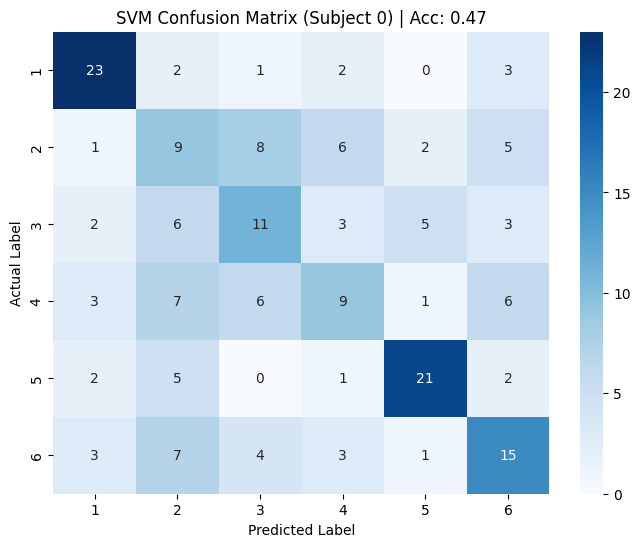

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# ---------------------------------------------------------
# 1. 데이터 수집 및 차원 변환 (Flatten)
# ---------------------------------------------------------
# combined_dataset[0]은 9개의 블록을 가진 리스트라고 가정
subject_0_data = combined_dataset[0]

X_list = []
y_list = []

print("데이터 로딩 중...")
for block in subject_0_data:
    # -----------------------------------------------------
    # [주의] 데이터셋 구조에 따라 아래 줄 수정이 필요할 수 있습니다.
    # 경우 1: 데이터셋이 (data, label) 튜플을 반환하는 경우 (가장 흔함)
    if isinstance(block, tuple) or isinstance(block, list):
        x_block, y_block = block[0], block[1] # 혹은 dataset 구조에 맞게 인덱싱
    # 경우 2: block 자체가 딕셔너리인 경우
    # x_block = block['data']
    # y_block = block['label']
    # -----------------------------------------------------
    
    # 딥러닝 텐서라면 numpy로 변환
    if hasattr(x_block, 'numpy'): x_block = x_block.numpy()
    if hasattr(y_block, 'numpy'): y_block = y_block.numpy()
    
    # (103, 57, 451)
    X_list.append(x_block)
    y_list.append(y_block)

# 9개 블록을 하나로 합침
# X_all shape: (927, 57, 451)  (103 trials * 9 blocks = 927)
X_all = np.concatenate(X_list, axis=0) 
y_all = np.concatenate(y_list, axis=0)

print(f"원본 데이터 형상: {X_all.shape}")

# SVM 입력을 위해 2차원으로 펼치기 (Flatten)
# (N, 57, 451) -> (N, 57*451) = (N, 25707)
# 특징이 2.5만 개로 많지만 900개 샘플이면 SVM이 돌아갑니다.
n_samples = X_all.shape[0]
X_flatten = X_all.reshape(n_samples, -1)

print(f"SVM 입력 형상: {X_flatten.shape}")

# ---------------------------------------------------------
# 2. Train / Test Split
# ---------------------------------------------------------
# 80% 학습, 20% 테스트 (random_state로 고정하여 재현성 확보)
X_train, X_test, y_train, y_test = train_test_split(
    X_flatten, y_all, test_size=0.2, random_state=42, stratify=y_all
)

# ---------------------------------------------------------
# 3. SVM 모델 학습
# ---------------------------------------------------------
print("SVM 학습 시작... (특징이 많아 시간이 조금 걸릴 수 있습니다)")

# class_weight='balanced': 데이터 불균형이 있다면 자동으로 가중치 조절
# kernel='rbf': 비선형 분류 (EEG에 적합) / 너무 느리면 'linear'로 변경
svm_model = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

print("학습 완료!")

# ---------------------------------------------------------
# 4. 평가 및 Confusion Matrix 시각화
# ---------------------------------------------------------
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix 그리기
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in sorted(np.unique(y_all))] # 0~5

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title(f'SVM Confusion Matrix (Subject 0) | Acc: {acc:.2f}')
plt.show()

# ms classifier

In [16]:


def save_acc_matrix(subject_id, acc_matrix, suffix):
    df = pd.DataFrame(acc_matrix)
    file_name = f"acc_matrix_{subject_id}_{suffix}.csv"
    df.to_csv(f'SVM/{file_name}', index=False)
    print(f"Saved: SVM/{file_name}")

def save_tgm(subject_id, acc_matrix, suffix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(acc_matrix, annot=False, cmap='viridis')
    plt.title(f'Temporal Generalization Matrix - Subject {subject_id} - {suffix}')
    plt.xlabel('Test Time Bins')
    plt.ylabel('Train Time Bins')
    file_name = f'tgm_{subject_id}_{suffix}.png'
    plt.savefig(f'SVM/{file_name}')
    plt.close()
    print(f"Saved: SVM/{file_name}")

def save_cm(subject_id,acc_matrix,X_binned, test_idx, y_test, suffix):
    best_time_bin = np.argmax(np.diag(acc_matrix))
    clf_best = SVC(kernel='rbf', class_weight='balanced', random_state=42)
    X_binned = X_binned
    test_idx = test_idx
    y_test = y_test
    clf_best.fit(X_binned[train_idx, :, best_time_bin], y_train)
    y_pred_best = clf_best.predict(X_binned[test_idx, :, best_time_bin])
    cm = confusion_matrix(y_test, y_pred_best)
    class_names = [str(i) for i in sorted(np.unique(y_all))]
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix at Best Time Bin ({best_time_bin}), {-200+best_time_bin*20}ms - Subject {subject_id}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    file_name = f'cm_{subject_id}_{suffix}.png'
    plt.savefig(f'SVM/{file_name}')
    plt.close()
    print(f"Saved: SVM/{file_name}")

In [18]:
# ---------------------------------------------------------
# 1. 데이터 수집 및 차원 변환 (Flatten)
# ---------------------------------------------------------
# combined_dataset[0]은 9개의 블록을 가진 리스트라고 가정



acc_matrix_all = []
acc_matrix_woNull_all = []

print("데이터 로딩 중...")
for i, subject_data in enumerate(combined_dataset):
    subject_id = processed_subject_ids[i]
    print(f"\n=== Subject {subject_id} ({i+1}/{len(combined_dataset)}) ===")
    X_list = []
    y_list = []
    for block in subject_data:

        if isinstance(block, tuple) or isinstance(block, list):
            x_block, y_block = block[0], block[1] # 혹은 dataset 구조에 맞게 인덱싱

        # 딥러닝 텐서라면 numpy로 변환
        if hasattr(x_block, 'numpy'): x_block = x_block.numpy()
        if hasattr(y_block, 'numpy'): y_block = y_block.numpy()
        
        # (103, 57, 451)
        X_list.append(x_block)
        y_list.append(y_block)

    # 9개 블록을 하나로 합침
    # X_all shape: (927, 57, 451)  (103 trials * 9 blocks = 927)
    X_all = np.concatenate(X_list, axis=0) 
    y_all = np.concatenate(y_list, axis=0)

    print(f"원본 데이터 형상: {X_all.shape}")

    # ---------------------------------------------------------
    # 2. Time-binning (451ms -> 45 bins)
    # ---------------------------------------------------------
    n_timepoints = X_all.shape[2]
    window_size = 10                     
    n_bins = n_timepoints // window_size # 451 // 10 = 45

    # 450개까지만 잘라서 45등분 (나머지 1개 버림)
    X_trimmed = X_all[:, :, :window_size * n_bins] 
    # (N, 57, 45, 10) 형태로 변환 후, 마지막 축(10)에 대해 평균
    X_binned = X_trimmed.reshape(X_all.shape[0], 57, n_bins, window_size).mean(axis=-1)

    # 최종 형태: (N, 57, 45) -> (Batch, Channel, TimeBin)
    print(f"Binned Shape: {X_binned.shape}")

    # ---------------------------------------------------------
    # 3. Train/Test Split (인덱스로 분리)
    # ---------------------------------------------------------
    # 모든 시간대에서 동일한 샘플이 Test셋으로 가야 하므로, 인덱스를 먼저 나눕니다.
    indices = np.arange(len(y_all))
    train_idx, test_idx, y_train, y_test = train_test_split(
        indices, y_all, test_size=0.2, random_state=42, stratify=y_all
    )

    # ---------------------------------------------------------
    # 4. Temporal Generalization (Time x Time Loop)
    # ---------------------------------------------------------
    # 결과 저장용 매트릭스 (45 x 45)
    # 행(Row): 학습한 시간 (Train Time)
    # 열(Col): 테스트한 시간 (Test Time)
    accuracy_matrix = np.zeros((n_bins, n_bins))
    accuracy_matrix_woNull = np.zeros((n_bins, n_bins))
    print("Temporal Generalization 시작...")

    # [Outer Loop] Train Time: 특정 시간대의 데이터로 모델을 만듦
    for t_train in range(n_bins):
        
        # 1. 학습 데이터 준비 (t_train 시점)
        # (N_train, 57) 형태로 Flatten
        X_train_curr = X_binned[train_idx, :, t_train]
        
        # 2. SVM 모델 학습
        clf = SVC(kernel='rbf', class_weight='balanced', random_state=42)
        clf.fit(X_train_curr, y_train)
        
        # [Inner Loop] Test Time: 만든 모델을 모든 시간대에 테스트
        for t_test in range(n_bins):
            
            # 3. 테스트 데이터 준비 (t_test 시점)
            X_test_curr = X_binned[test_idx, :, t_test]
            
            # 4. 예측 및 정확도 저장
            y_pred = clf.predict(X_test_curr)

            target_mask = (y_test >= 2)& (y_test <=6)
            y_test_filtered = y_test[target_mask]
            y_pred_filtered = y_pred[target_mask]

            if len(y_test_filtered)>0:
                acc_woNull = accuracy_score(y_test_filtered, y_pred_filtered)
                acc = accuracy_score(y_test, y_pred)
            
            accuracy_matrix[t_train, t_test] = acc
            accuracy_matrix_woNull[t_train, t_test] = acc_woNull

        # print(f"Train Time Bin [{t_train+1}/{n_bins}] 완료")

    save_acc_matrix(subject_id,accuracy_matrix_woNull,f'SVM_acc{np.max(accuracy_matrix_woNull):.4f}')
    save_tgm(subject_id,accuracy_matrix_woNull,f'SVM_tgm{np.max(accuracy_matrix_woNull):.4f}')
    save_cm(subject_id,accuracy_matrix_woNull, X_binned, test_idx, y_test, f'SVM_cm{np.max(accuracy_matrix_woNull):.4f}')

    acc_matrix_all.append(accuracy_matrix)
    acc_matrix_woNull_all.append(accuracy_matrix_woNull)

데이터 로딩 중...

=== Subject sub-58 (1/57) ===
원본 데이터 형상: (938, 57, 451)
Binned Shape: (938, 57, 45)
Temporal Generalization 시작...
Saved: SVM/acc_matrix_sub-58_SVM_acc0.3185.csv
Saved: SVM/tgm_sub-58_SVM_tgm0.3185.png
Saved: SVM/cm_sub-58_SVM_cm0.3185.png

=== Subject sub-50 (2/57) ===
원본 데이터 형상: (828, 57, 451)
Binned Shape: (828, 57, 45)
Temporal Generalization 시작...
Saved: SVM/acc_matrix_sub-50_SVM_acc0.2867.csv
Saved: SVM/tgm_sub-50_SVM_tgm0.2867.png
Saved: SVM/cm_sub-50_SVM_cm0.2867.png

=== Subject sub-26 (3/57) ===
원본 데이터 형상: (934, 57, 451)
Binned Shape: (934, 57, 45)
Temporal Generalization 시작...
Saved: SVM/acc_matrix_sub-26_SVM_acc0.3101.csv
Saved: SVM/tgm_sub-26_SVM_tgm0.3101.png
Saved: SVM/cm_sub-26_SVM_cm0.3101.png

=== Subject sub-62 (4/57) ===
원본 데이터 형상: (866, 57, 451)
Binned Shape: (866, 57, 45)
Temporal Generalization 시작...
Saved: SVM/acc_matrix_sub-62_SVM_acc0.3378.csv
Saved: SVM/tgm_sub-62_SVM_tgm0.3378.png
Saved: SVM/cm_sub-62_SVM_cm0.3378.png

=== Subject sub-63 (5/57) =

In [ ]:
np.max(accuracy_matrix_woNull)

0.33121019108280253

# ms Classifier (Visualization)

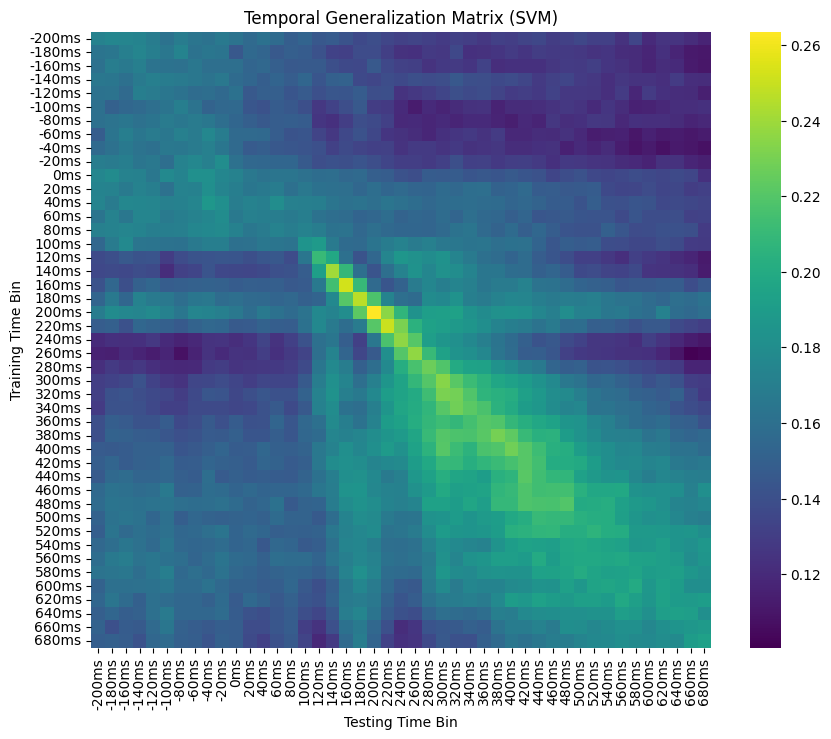


최고 성능 Time Bin: 20, 200ms

Accuracy at Best Time Bin: 0.2635


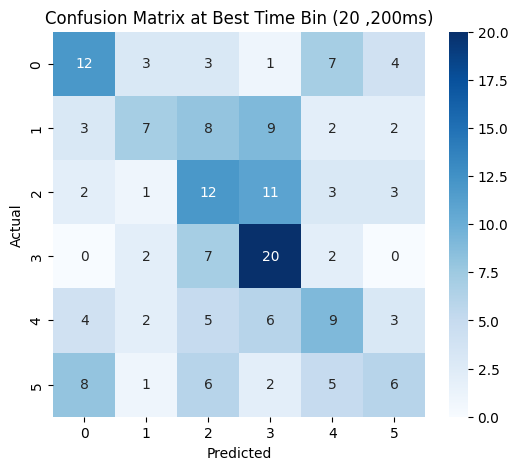

In [ ]:
acc_matrix_all_avg = np.mean(acc_matrix_all, axis=0)
acc_matrix_woNull_all_avg = np.mean(acc_matrix_woNull_all, axis=0)

# ---------------------------------------------------------
# 5. 시각화 (Temporal Generalization Matrix)
# ---------------------------------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(acc_matrix_woNull_all_avg, annot=False, fmt='.2f', cmap='viridis',
            xticklabels=[f"{-200+i*20}ms" for i in range(n_bins)],
            yticklabels=[f"{-200+i*20}ms" for i in range(n_bins)])

plt.xlabel('Testing Time Bin')
plt.ylabel('Training Time Bin')
plt.title('Temporal Generalization Matrix (SVM)')
# 대각선(Diagonal)이 각 시간대별 본인 성능(Standard Decoding)
# 대각선 외(Off-diagonal)는 시간 전이 성능(Generalization)
plt.show()

# ---------------------------------------------------------
# (옵션) 특정 대각선 시점의 Confusion Matrix 확인
# 예: 가장 성능이 좋았던 시간대의 Confusion Matrix
# ---------------------------------------------------------
best_time_bin = np.argmax(np.diag(acc_matrix_woNull_all_avg)) # 대각선 중 최고점 인덱스
print(f"\n최고 성능 Time Bin: {best_time_bin}, {-200+best_time_bin*20}ms")
print(f"\nAccuracy at Best Time Bin: {acc_matrix_woNull_all_avg[best_time_bin, best_time_bin]:.4f}")

# 다시 그 시점 데이터로 예측
clf_best = SVC(kernel='rbf', class_weight='balanced', random_state=42)
clf_best.fit(X_binned[train_idx, :, best_time_bin], y_train)
y_pred_best = clf_best.predict(X_binned[test_idx, :, best_time_bin])

cm = confusion_matrix(y_test, y_pred_best)
class_names = [str(i-1) for i in sorted(np.unique(y_all))]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix at Best Time Bin ({best_time_bin} ,{-200+best_time_bin*20}ms)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import torch

# GPU ���� ���� ���� ����
if torch.cuda.is_available():
    print("? GPU ���� ����!")
    print(f"GPU ������: {torch.cuda.get_device_name(0)}")
    print(f"���� ������ GPU ����: {torch.cuda.device_count()}")
else:
    print("? GPU�� ���� �� ��������. CPU�� ����������.")

In [ ]:
len(acc_matrix_all)

In [ ]:

np.savez('results.npz', 
         acc_matrix_all_avg=acc_matrix_all_avg,
         acc_matrix_woNull_all_avg=acc_matrix_woNull_all_avg,
         acc_matrix_all=acc_matrix_all,
         acc_matrix_woNull_all=acc_matrix_woNull_all)

print("���� ����: results.npz")

In [ ]:
acc_matrix_woNull_all_avg[29,29]

0.35106382978723405

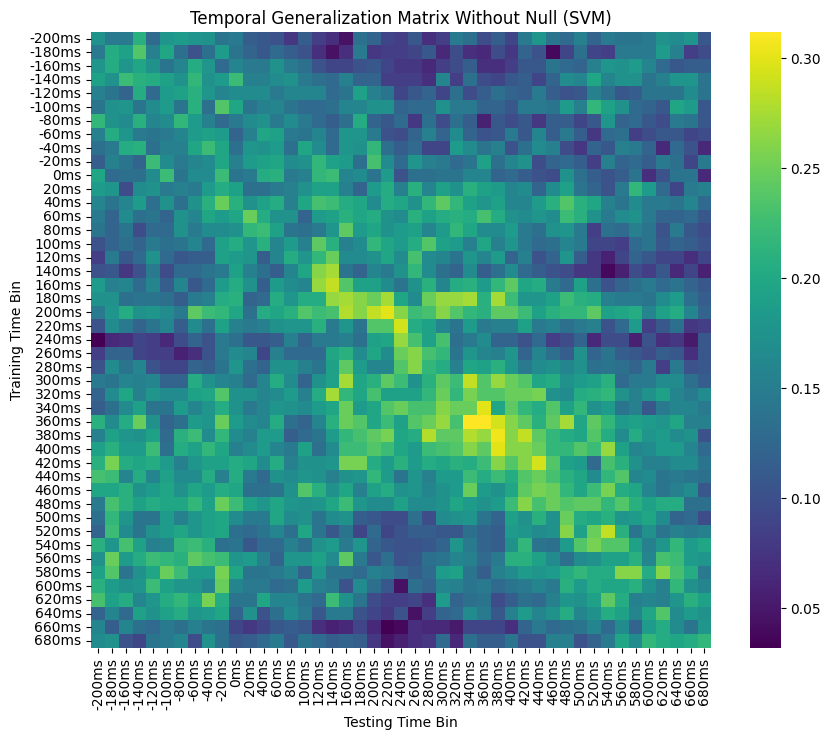


최고 성능 Time Bin: 28,360ms Accuracy: 0.3121


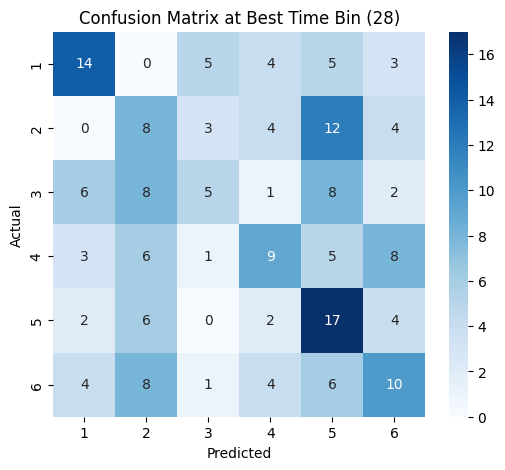

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_matrix_woNull, annot=False, fmt='.2f', cmap='viridis',
            xticklabels=[f"{-200+i*20}ms" for i in range(n_bins)],
            yticklabels=[f"{-200+i*20}ms" for i in range(n_bins)])

plt.xlabel('Testing Time Bin')
plt.ylabel('Training Time Bin')
plt.title('Temporal Generalization Matrix Without Null (SVM)')
# 대각선(Diagonal)이 각 시간대별 본인 성능(Standard Decoding)
# 대각선 외(Off-diagonal)는 시간 전이 성능(Generalization)
plt.show()

best_time_bin = np.argmax(np.diag(accuracy_matrix_woNull)) # 대각선 중 최고점 인덱스
print(f"\n최고 성능 Time Bin: {best_time_bin},{-200+best_time_bin*20}ms Accuracy: {accuracy_matrix_woNull[best_time_bin, best_time_bin]:.4f}")

# 다시 그 시점 데이터로 예측
clf_best = SVC(kernel='rbf', class_weight='balanced', random_state=42)
clf_best.fit(X_binned[train_idx, :, best_time_bin], y_train)
y_pred_best = clf_best.predict(X_binned[test_idx, :, best_time_bin])

target_mask = (y_test >= 2)& (y_test <=6)
y_test_filtered = y_test[target_mask]
y_pred_filtered = y_pred[target_mask]

cm = confusion_matrix(y_test, y_pred_best)
class_names = [str(i) for i in sorted(np.unique(y_all))]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix at Best Time Bin ({best_time_bin})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Visualization Processed EEG

Plotting 6 labels...


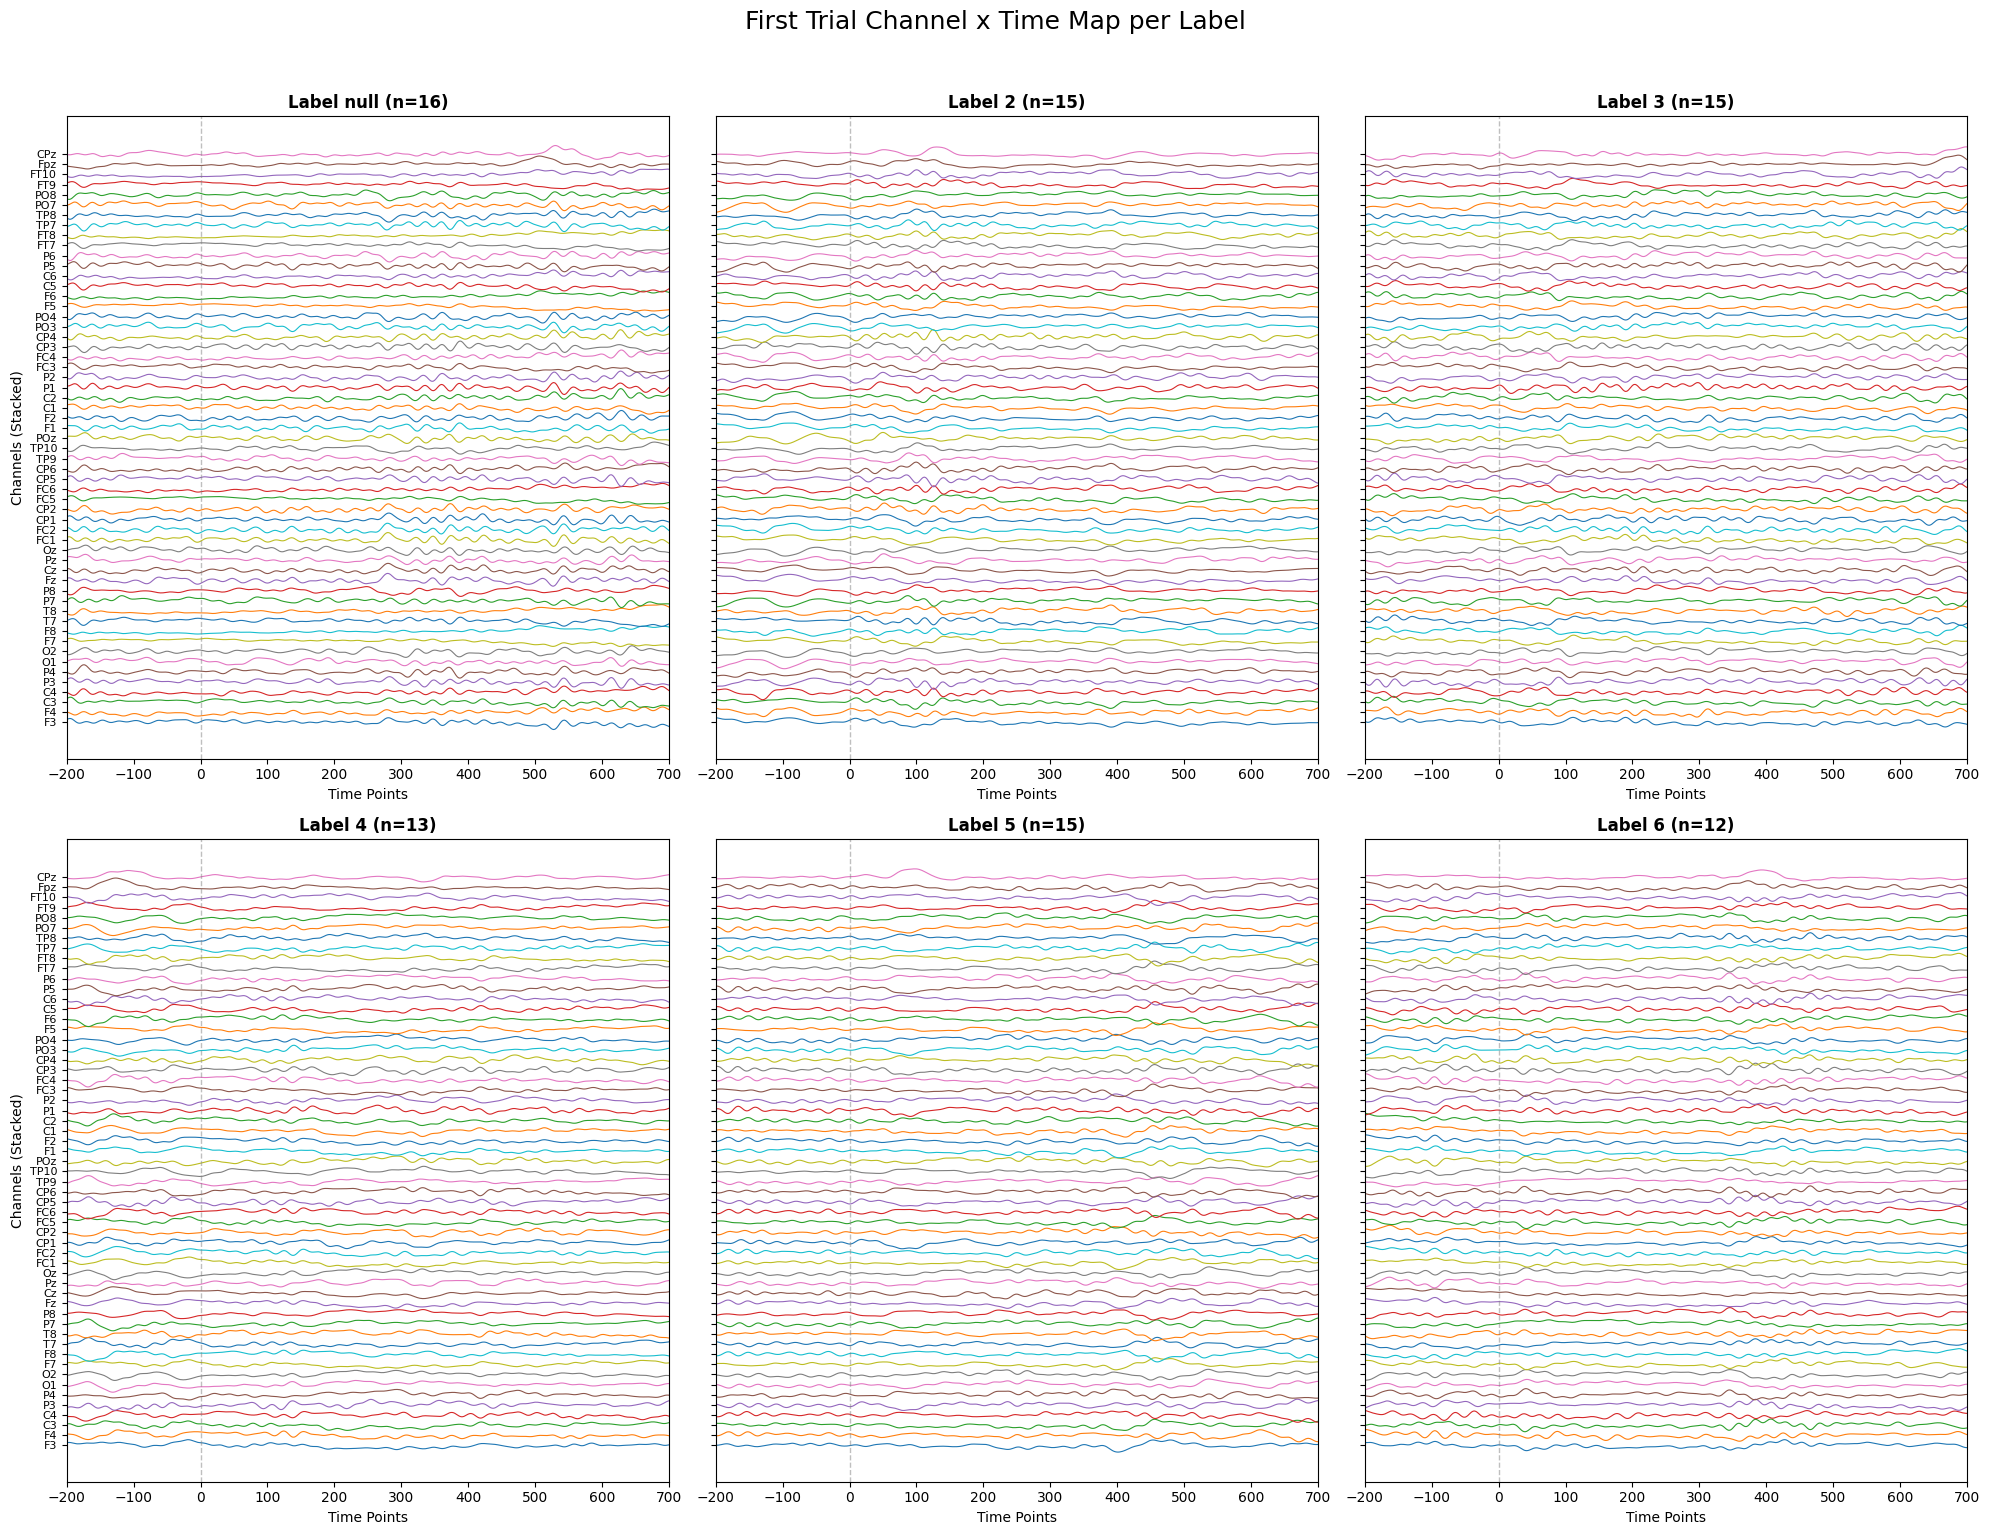

In [ ]:
# 데이터 정의
x_data = x_combined 
y_data = y_combined
unique_labels = np.unique(y_data)
real_time = np.linspace(-200, 700, 451)

# --- 설정값 ---
gap = 5.0  # 채널 간격
# ch_names가 없다면 임시로 생성 (있으면 이 줄 지우세요)
if 'ch_names' not in locals():
    ch_names = [f"Ch{i+1}" for i in range(57)] 
# --------------

# 1. 2행 3열 레이아웃 고정
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15), sharey=True)
axes_flat = axes.flatten()

print(f"Plotting {len(unique_labels)} labels...")

for i, ax in enumerate(axes_flat):
    # 라벨 개수보다 칸이 많으면 빈 칸 숨김
    if i >= len(unique_labels):
        ax.axis('off')
        continue

    label = unique_labels[i]
    idxs = np.where(y_data == label)[0]
    
    # [수정] idxs[1]은 위험합니다 (데이터가 1개면 에러남). idxs[0]으로 변경
    # 데이터가 1개 이상일 때만 그림
    if len(idxs) > 0:
        data_class = x_data[idxs[0]] # 첫 번째 Trial 선택
        # data_class = np.mean(x_data[idxs], axis=0)

        n_channels = data_class.shape[0]

        # 정규화 (Normalization)
        mean = np.mean(data_class, axis=1, keepdims=True)
        std = np.std(data_class, axis=1, keepdims=True)
        std[std == 0] = 1.0
        normalized_data = (data_class - mean) / std

        # 그래프 그리기
        for ch in range(n_channels):
            offset = ch * gap
            signal = normalized_data[ch] + offset
            ax.plot(real_time, signal, linewidth=0.8)

        # --- [핵심 수정] Y축 눈금 위치 맞추기 ---
        # 신호를 ch * gap 위치에 그렸으니, 눈금도 거기 찍어야 함
        yticks = np.arange(n_channels) * gap 
        ax.set_yticks(yticks)
        ax.set_yticklabels(ch_names, fontsize=8) # 폰트 작게
        ax.set_xticks(np.arange(-200,701,100))
        ax.set_xlim(-200,700)
        ax.axvline(x=0, color='gray', linestyle='--', linewidth=1.0, alpha=0.5)

        # 타이틀: n은 실제 데이터 개수(len(idxs))를 보여주는 게 맞습니다.
        if label == 1:
            ax.set_title(f"Label null (n={len(idxs)})", fontsize=12, fontweight='bold')
        else:
            ax.set_title(f"Label {label} (n={len(idxs)})", fontsize=12, fontweight='bold')
        ax.set_xlabel("Time Points")
        
        # Y축 라벨은 첫 번째 열에만 표시 (깔끔하게)
        if i % 3 == 0:
            ax.set_ylabel("Channels (Stacked)")

plt.suptitle("First Trial Channel x Time Map per Label", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

---

## Raw Data
1. .set
2. .fdt
- filename: sub14-run01-pulse_500-obs3

In [ ]:
raw_data_dir = Path("/local_raid3/03_user/myyu/EEG-fMRI/prep-obs_pc1")
raw_subject_ids = os.listdir(raw_data_dir)

raw_data_all = []  # structure: [subject][run] = (X, y)

for subject_id in raw_subject_ids:
    subject_data = []  # list of (X, y) for this subject

    for run_n in run_ns:
        file_path = raw_data_dir / f"{subject_id}" / "TRI" / f"{subject_id}_run{run_n}_stim_icaRej-epo.fif"

        epochs = mne.read_epochs(file_path, preload=True)
        X = epochs.get_data()         # shape: (n_trials, n_channels, n_times)
        y = epochs.events[:, 2]       # shape: (n_trials,)
        

        subject_data.append((X, y))   # (X, y) tuple

    raw_data_all.append(subject_data)

FileNotFoundError: File does not exist: /local_raid3/03_user/myyu/EEG-fMRI/prep-obs_pc1/sub-58/TRI/sub-58_run01_stim_icaRej-epo.fif

In [ ]:
# t: -200ms~700ms
# x: (images, C, T)

x,y = raw_data_all[0][0]
print(f"shape of x: {x.shape}")
print(f"shape of y: {y.shape}")
print(f"min:{np.min(x)}, max: {np.max(x)}")
print(np.unique(y))

#same label in null data

shape of x: (83, 57, 451)
shape of y: (83,)
min:-5.9178851911364825e-05, max: 5.222092036645801e-05
[2 3 4 5 6]


In [ ]:
total_counts = Counter()

for subject_data in data_all:
    for X, y in subject_data:
        #y = (n_trials,)
        total_counts.update(y)

print(f"total sample number:{sum(total_counts.values())}")

sorted_labels = sorted(total_counts.keys())

for label in sorted_labels:
    count = total_counts[label]
    percentage = (count/sum(total_counts.values()))*100
    print(f"Label {label}:{count} ({percentage:.2f})%")

    

total sample number:11311
Label 2:2275 (20.11)%
Label 3:2267 (20.04)%
Label 4:2256 (19.95)%
Label 5:2268 (20.05)%
Label 6:2245 (19.85)%


In [ ]:
total_counts = Counter()

for subject_data in data__:
    for X, y in subject_data:
        #y = (n_trials,)
        total_counts.update(y)

print(f"total sample number:{sum(total_counts.values())}")

sorted_labels = sorted(total_counts.keys())

for label in sorted_labels:
    count = total_counts[label]
    percentage = (count/sum(total_counts.values()))*100
    print(f"Label {label}:{count} ({percentage:.2f})%")

    

total sample number:2128
Label 2:408 (19.17)%
Label 3:437 (20.54)%
Label 4:430 (20.21)%
Label 5:420 (19.74)%
Label 6:433 (20.35)%


In [ ]:
# t: 1000ms~1900ms
# x: (images, C, T)

x,y = data__[0][0]
print(f"shape of x: {x.shape}")
print(f"shape of y: {y.shape}")
print(f"min:{np.min(x)}, max: {np.max(x)}")
print(np.unique(y))

#same label in null data

shape of x: (15, 57, 451)
shape of y: (15,)
min:-4.4806613799582054e-05, max: 4.789804059385715e-05
[2 3 4 5 6]


# data to csv

In [ ]:
im_eeg = [] # structure: [subject] = [[x_subj,y_subj], [x_subj,y_subj], [x_subj,y_subj], ...]
            # X_subj: (sum_trials, n_channels, n_times)
            # y_subj: (sum_trials,)

for i, subject_data in enumerate(data_all): # subject_data: nth person's data(all epochs)
                                            # [(X_run1, y_run1), (X_run2, y_run2), ...]
    X_list = []
    y_list = []
    for X, y in subject_data:

        X_list.append(X.astype(np.float32, copy=False))
        y_list.append(y.astype(np.int64,  copy=False))
    X_subj = np.concatenate(X_list, axis=0)   # (total trial number, n_channels, n_times)
    y_subj = np.concatenate(y_list, axis=0)   # (total trial number)
    
    np.savez_compressed(f"eeg/sub-{subject_ids[i]}",X=X_subj,y=y_subj)
    # im_eeg.append((X_subj,y_subj))       
    print(f"sub#{i}: X={X_subj.shape}, y={y_subj.shape}, y unique={np.unique(y_subj)}")
    
    
# for i, (X_subj, y_subj) in enumerate(im_eeg):
#     print(f"sub#{i}: X={X_subj.shape}, y={y_subj.shape}, y unique={np.unique(y_subj)}")



sub#0: X=(779, 57, 451), y=(779,), y unique=[2 3 4 5 6]
sub#1: X=(793, 57, 451), y=(793,), y unique=[2 3 4 5 6]
sub#2: X=(775, 57, 451), y=(775,), y unique=[2 3 4 5 6]
sub#3: X=(625, 57, 451), y=(625,), y unique=[2 3 4 5 6]
sub#4: X=(797, 57, 451), y=(797,), y unique=[2 3 4 5 6]
sub#5: X=(725, 57, 451), y=(725,), y unique=[2 3 4 5 6]
sub#6: X=(741, 57, 451), y=(741,), y unique=[2 3 4 5 6]
sub#7: X=(738, 57, 451), y=(738,), y unique=[2 3 4 5 6]
sub#8: X=(786, 57, 451), y=(786,), y unique=[2 3 4 5 6]
sub#9: X=(772, 57, 451), y=(772,), y unique=[2 3 4 5 6]
sub#10: X=(799, 57, 451), y=(799,), y unique=[2 3 4 5 6]
sub#11: X=(709, 57, 451), y=(709,), y unique=[2 3 4 5 6]
sub#12: X=(713, 57, 451), y=(713,), y unique=[2 3 4 5 6]
sub#13: X=(774, 57, 451), y=(774,), y unique=[2 3 4 5 6]
sub#14: X=(785, 57, 451), y=(785,), y unique=[2 3 4 5 6]


In [ ]:
# read data
from mne.io import write_info, read_info

data_dir = Path("/local_raid3/03_user/hoian/brlBandit/summer-school-eeg/summer-school-eeg/")

subject_ids = ["16", "17", "22", "27", "33", "39", "40", "56", "58", "59", "64", "68", "69", "72", "79"]
run_ns = ["01", "02", "03", "04", "05", "06", "07", "08", "09"]


data_all = []  # structure: [subject][run] = (X, y)

for subject_id in subject_ids:
    # subject_id = "16"
    subject_data = []  # list of (X, y) for this subject
    X_list = []
    y_list = []
    infos = []
    for run_n in run_ns:
        file_path = data_dir / f"sub-{subject_id}" / "TRI" / "epochs_data" / f"sub-{subject_id}_run{run_n}_stim_icaRej-epo.fif"
    
        epochs = mne.read_epochs(file_path, preload=True)
        X = epochs.get_data()         # shape: (n_trials, n_channels, n_times)
        y = epochs.events[:, 2]       # shape: (n_trials,)
        # info = epochs.info
    
        # X_list.append(X.astype(np.float32, copy=False))
        # y_list.append(y.astype(np.int64,  copy=False))
        # # infos.append(info)
        
        # subject_data.append((X, y))   # (X, y) tuple
        
    # for ch_idx, ch_name in enumerate(infos[0]['ch_names']):
    #     locs = [info['chs'][ch_idx]['loc'][:3] for info in infos]  # �� run���� ���� ���� ����
    #     same = all(np.allclose(locs[0], loc, atol=1e-6, equal_nan=True) for loc in locs[1:])
    #     if not same:
    #         print('#########################################################')
    #         print(f"Channel {ch_name} has different locs across runs:")
    #         print('#########################################################')
    #         for r, loc in enumerate(locs):
    #             print(f"  Run {r+1}: {loc}")
        if run_n =='01':
        
            mne.io.write_info(f"EEG/sub-{subject_id}-info.fif", epochs.info)
            print('saved!')
            
    # X_subj = np.concatenate(X_list, axis=0)   # (total trial number, n_channels, n_times)
    # y_subj = np.concatenate(y_list, axis=0)   # (total trial number)
    
    
    # np.savez_compressed(f"EEG_info/sub-{subject_id}",X=X_subj,y=y_subj)
    
    
    print(f"sub#{subject_id}: X={X_subj.shape}, y={y_subj.shape}, y unique={np.unique(y_subj)}")
    print('#########################################################')
    data_all.append(subject_data)

In [ ]:
# %reset -f
data = np.load("eeg/sub-16.npz")
print(data)

NpzFile 'eeg/sub-16.npz' with keys: X, y


In [ ]:
# allow_pickle=True �������� NPZ ���� ��������
data = np.load("EEG_info/sub-16.npz", allow_pickle=True)
print(data)

X_loaded = data['X']
y_loaded = data['y']

# info ������ .item() �������� �������� ������.
info_loaded = data['info'].item()

print("X shape:", X_loaded.shape)
print("y shape:", y_loaded.shape)
#print("Info ch_names:", info_loaded['chs'])

NpzFile 'EEG_info/sub-16.npz' with keys: X, y, info
X shape: (779, 57, 451)
y shape: (779,)


In [ ]:
print(X_loaded.shape)

print(info_loaded)
print(type(info_loaded))
print('================================')
print(len(info_loaded['chs']))      # num of chs = 57
print(info_loaded['ch_names'])
# loc: [ X, Y, Z , orientation vector x, y , z

(779, 57, 451)
<Info | 11 non-empty values
 bads: []
 ch_names: F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, P8, Fz, Cz, ...
 chs: 57 EEG
 custom_ref_applied: False
 dig: 68 items (3 Cardinal, 65 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 40.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 57
 projs: Average EEG reference: on
 sfreq: 500.0 Hz
>
<class 'mne._fiff.meas_info.Info'>
57
['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']


In [ ]:
print(data['X'].shape)

(779, 57, 451)


In [ ]:
epochs = mne.read_epochs(file_path, preload=True)
z = epochs.get_data()

Reading /local_raid3/03_user/hoian/brlBandit/summer-school-eeg/summer-school-eeg/sub-79/TRI/epochs_data/sub-79_run09_stim_icaRej-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 57) active
    Found the data of interest:
        t =    -200.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
91 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [ ]:
epochs = mne.read_epochs(file_path, preload=True)

X = epochs.get_data()
y = epochs.events[:, 2]

print("EEG channels:", len(mne.pick_types(epochs.info, eeg=True)))
print("All channels :", epochs.info['nchan'])
print("X shape:", X.shape)

# event code and freq
import numpy as np
vals, cnts = np.unique(y, return_counts=True)
print("event codes:", dict(zip(vals, cnts)))

# 1/5 sampling check
n_trials = X.shape[0]
n_keep = int(n_trials * 0.2)
idx = np.random.choice(n_trials, size=n_keep, replace=False)
print("subset shape should be:", (n_keep, X.shape[1], X.shape[2]))


Reading /local_raid3/03_user/hoian/brlBandit/summer-school-eeg/summer-school-eeg/sub-79/TRI/epochs_data/sub-79_run09_stim_icaRej-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 57) active
    Found the data of interest:
        t =    -200.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
91 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
EEG channels: 57
All channels : 57
X shape: (91, 57, 451)
event codes: {2: 18, 3: 16, 4: 17, 5: 22, 6: 18}
subset shape should be: (18, 57, 451)


In [ ]:
# making null data label 1
for i in range(15):
    for j in range(9):
        data__[i][j][1][:] = 1

In [ ]:
# data__1 = np.array(data_all[0][0][0][:,0,0])
# print(data__1.shape)

In [ ]:
print(X.min()*1, X.max()*1)

-0.0001025953901925534 0.00011715067260943337


## Data preprocessing
### Averaging Filter

In [ ]:
# five point bin avaeraging
def five_point_averaging_nonoverlap(data_all):
    """
    data_all: list of list of tuples (X, y)
    Applies 5-point average smoothing on time axis (axis=-1) for all X
    Returns: same structure with smoothed X 
    """
    data_smoothed = []

    for subject_data in data_all:
        subject_smoothed = []
        for X, y in subject_data:
            trials, channels, time = X.shape
            trimmed_time = (time // 5) * 5  # Make divisible by 5
            X_trimmed = X[:, :, :trimmed_time]  # Cut off extra time points
            X_reshaped = X_trimmed.reshape(trials, channels, -1, 5)  # shape: (trials, channels, num_segments, 5)
            X_avg = X_reshaped.mean(axis=-1)  # Average over the last dimension (5-point)
            subject_smoothed.append((X_avg, y))
        data_smoothed.append(subject_smoothed)

    return data_smoothed

data_eeg = five_point_averaging_nonoverlap(data_all)
data_null = five_point_averaging_nonoverlap(data__)

In [ ]:
def subj_meta(K):
    """
    data_eeg[K]: list of 9 runs (each is a tuple (X, y))
        - X: shape (n_trials, n_channels, n_times)
        - y: shape (n_trials,)
    """
    X_list, y_list, run_id_list = [], [], []


    for run_idx, (X_orig, y_orig) in enumerate(data_eeg[K]):
        X_list.append(X_orig)
        y_list.append(y_orig)
        run_id_list.extend([run_idx] * len(y_orig))

    for run_idx, (X_orig, y_orig) in enumerate(data_null[K]):
        X_list.append(X_orig)
        y_list.append(y_orig)
        run_id_list.extend([run_idx] * len(y_orig))

    X_all = np.concatenate(X_list, axis=0)  # (total_trials, n_channels, n_times)
    y_all = np.concatenate(y_list, axis=0)  # (total_trials,)
    run_ids = np.array(run_id_list)         # (total_trials,)

    #print(y_list, y_all)
    return X_all, y_all, run_ids

In [ ]:
# fit dataset with sliding time window
# input shape = (batch, channel, height, width) = (batch, 1 or 4 or 8, nodes=57, width=6)

def subj_sliding(X_all, window_size=6):
    """
    X_all: np.array of shape (total_trials, n_channels=57, n_times=90)
    Returns:
        X_windows: np.array of shape (n_windows=85, total_trials, 1, 57, 6)
    """
    total_trials, n_channels, n_times = X_all.shape
    n_windows = n_times - window_size + 1  # = 85
    
    X_windows = np.empty((n_windows, total_trials, 1, n_channels, window_size), dtype=np.float32)

    for t in range(n_windows):
        # sliding window
        # (total_trials, n_channels, window_size) �� (total_trials, 1, 57, 6)
        X_slice = X_all[:, :, t:t+window_size]  
        X_windows[t] = X_slice[:, np.newaxis, :, :]  

    return X_windows  # shape: (85, total_trials, 1, 57, 6)

#### re-allocating nodes

In [ ]:
orig_node = ['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']

horiz1_node = [ 'Fpz', 'F8', 'F6', 'F4', 'F2', 'Fz', 'F1', 'F3', 'F5', 'F7', 
               'FT10', 'FT8', 'FC6', 'FC4', 'FC2', 'FC1', 'FC3', 'FC5', 'FT7', 'FT9',
                'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 
                'TP10', 'TP8', 'CP6', 'CP4', 'CP2', 'CPz', 'CP1', 'CP3', 'CP5', 'TP7', 'TP9', 
                'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 
                'PO8', 'PO4', 'POz', 'PO3', 'PO7', 
                'O1', 'Oz', 'O2' ]

horiz2_node = [ 'O1', 'Oz', 'O2', 
                'PO8', 'PO4', 'POz', 'PO3', 'PO7', 
                'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 
                'TP10', 'TP8', 'CP6', 'CP4', 'CP2', 'CPz', 'CP1', 'CP3', 'CP5', 'TP7', 'TP9', 
                'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 
                'FT10', 'FT8', 'FC6', 'FC4', 'FC2', 'FC1', 'FC3', 'FC5', 'FT7', 'FT9',
                'F8', 'F6', 'F4', 'F2', 'Fz', 'F1', 'F3', 'F5', 'F7', 'Fpz'
]
vert1_node = [ 'FT9', 'TP9',
                'PO7', 'P7', 'TP7', 'T7', 'FT7', 'F7', 
                'F5', 'FC5', 'C5', 'CP5', 'P5', 
                'O1', 'PO3', 'P3', 'CP3', 'C3', 'FC3', 'F3',
                'F1', 'FC1', 'C1', 'CP1', 'P1', 
                'Oz', 'POz', 'Pz', 'CPz', 'Cz', 'Fz', 'Fpz', 
                'F2', 'FC2', 'C2', 'CP2', 'P2', 
                'O2', 'PO4', 'P4', 'CP4', 'C4', 'FC4', 'F4',
                'F6', 'FC6', 'C6', 'CP6', 'P6', 
                'PO8', 'P8', 'TP8', 'T8', 'FT8', 'F8', 
                'FT10', 'TP10' ]
vert2_node = [ 'FT10', 'TP10',
                'PO8', 'P8', 'TP8', 'T8', 'FT8', 'F8', 
                'F6', 'FC6', 'C6', 'CP6', 'P6', 
                'O2', 'PO4', 'P4', 'CP4', 'C4', 'FC4', 'F4',
                'F2', 'FC2', 'C2', 'CP2', 'P2', 
                'Oz', 'POz', 'Pz', 'CPz', 'Cz', 'Fz', 'Fpz', 
                'F1', 'FC1', 'C1', 'CP1', 'P1', 
                'O1', 'PO3', 'P3', 'CP3', 'C3', 'FC3', 'F3',
                'F5', 'FC5', 'C5', 'CP5', 'P5', 
                'PO7', 'P7', 'TP7', 'T7', 'FT7', 'F7', 
                'FT9', 'TP9' ]

In [ ]:
# filter - allocating nodes by spatial relations

def subj_space(X_windows):
    # changing sequence of nodes
    # maybe define all filters
    # then change

    idx1 = [orig_node.index(ch) for ch in horiz1_node]
    idx2 = [orig_node.index(ch) for ch in horiz2_node]
    idx3 = [orig_node.index(ch) for ch in vert1_node]
    idx4 = [orig_node.index(ch) for ch in vert2_node]

   
    X1 = X_windows[:, :, :, idx1, :]
    X2 = X_windows[:, :, :, idx2, :]
    X3 = X_windows[:, :, :, idx3, :]
    X4 = X_windows[:, :, :, idx4, :]
    X_spatial = np.concatenate([X1, X2, X3, X4], axis=2)  # shape: (trials, 2, 57, 6)
    return X_spatial

#### final input

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# integrate preprocessing

def subj_input(K):
    X_all, y_all, run_ids = subj_meta(K)
    X_window = subj_sliding(X_all)
    X_spatial = subj_space(X_window)

    orig_shape = X_spatial.shape  # (85, 933, 1, 57, 6)

    # (time * trials * channel, height * width) ������ ����
    X_flat = X_spatial.reshape(-1, orig_shape[-2] * orig_shape[-1])  # (85*933*1, 342)

    # StandardScaler ����
    scaler = StandardScaler()
    X_scaled_flat = scaler.fit_transform(X_flat)

    # ���� ���� shape�� ����
    X_scaled = X_scaled_flat.reshape(orig_shape)

    return X_scaled, y_all, run_ids
    #return X_window, y_all, run_ids

## reading decoder Generalizing Data 

In [ ]:
# read data
data_dir = Path("/local_raid3/03_user/hoian/eegdecoder/summer-school-eeg-bandit/")

subject_ids = ["16"]
run_ns = ["01", "02", "03", "04", "05", "06"]
stim_ids = ["stim1AC", "stim2AC", "stim3AC"]

data_all_test = []  # structure: [subject][run][targ_id] = (X, y)



#### origin. code

for subject_id in subject_ids:
    subject_data = []  # list of (X, y) for this subject

    for run_n in run_ns:
        run_data = []  # list of (X,y) for this run
        for targ_id in stim_ids:
            file_path = data_dir / f"sub-{subject_id}" / "bandit" / "epochs_data" / f"sub-{subject_id}_run{run_n}_{targ_id}_icaRej-epo.fif"
            epochs = mne.read_epochs(file_path, preload=True)
            X = epochs.get_data()         # shape: (n_trials, n_channels, n_times)
            
            run_n_int = int(run_n)
            if run_n_int % 3 == 1:
                task_type = "add"
            elif run_n_int % 3 == 2:
                task_type = "mul"
            else:
                task_type = "jump"

            file_path_1 = data_dir / "task_data" / f"sub-{subject_id}" / "bandit" / f"sub-{subject_id}_task-{task_type}_run-{run_n}_stims.csv"
            df = pd.read_csv(file_path_1, header=None)
            stim_idx = stim_ids.index(targ_id)
            y = df.iloc[:, stim_idx].values

            ep_log_path = data_dir / f"sub-{subject_id}" / "bandit" / "epochs_log"
            log_stim_fname = f'sub-{subject_id}_run{run_n}_{targ_id}_ica-rejected.npz'
            log_stim_path = os.path.join(ep_log_path,log_stim_fname)
            log_loaded = np.load(log_stim_path)
            mask = ~log_loaded['bad_epochs'] 
            # log_loaded['bad_epochs']  : 

            y_rej = np.array(y) # y : csv�� ���� ���� label list 
            if targ_id != 'stim1PC':
                if len(y_rej) != len(mask):
                    print(f"[Warning] Length mismatch: y={len(y_rej)}, mask={len(mask)} �� deleting y[0]")
                    y_rej = y_rej[1:]  # �� ���� �� ����
                y_rej = y_rej[mask]

            run_data.append((X, y_rej))   # (X, y) tuple
        subject_data.append(run_data)
    data_all_test.append(subject_data)

#### by tasks

In [ ]:
for subject_id in subject_ids:
    subject_data = []  # list of (X, y) for this subject

    for run_n in run_ns:
        run_data = []  # list of (X,y) for this run
        for targ_id in stim_ids:
            file_path = data_dir / f"sub-{subject_id}" / "bandit" / "epochs_data" / f"sub-{subject_id}_run{run_n}_{targ_id}_icaRej-epo.fif"
            epochs = mne.read_epochs(file_path, preload=True)
            X = epochs.get_data()         # shape: (n_trials, n_channels, n_times)
            
            run_n_int = int(run_n)
            if run_n_int % 3 == 1:
                task_type = "add"
            else:
                continue

            file_path_1 = data_dir / "task_data" / f"sub-{subject_id}" / "bandit" / f"sub-{subject_id}_task-{task_type}_run-{run_n}_stims.csv"
            df = pd.read_csv(file_path_1, header=None)
            stim_idx = stim_ids.index(targ_id)
            y = df.iloc[:, stim_idx].values

            ep_log_path = data_dir / f"sub-{subject_id}" / "bandit" / "epochs_log"
            log_stim_fname = f'sub-{subject_id}_run{run_n}_{targ_id}_ica-rejected.npz'
            log_stim_path = os.path.join(ep_log_path,log_stim_fname)
            log_loaded = np.load(log_stim_path)
            mask = ~log_loaded['bad_epochs'] 
            # log_loaded['bad_epochs']  : 

            y_rej = np.array(y) # y : csv�� ���� ���� label list 
            if targ_id != 'stim1PC':
                if len(y_rej) != len(mask):
                    print(f"[Warning] Length mismatch: y={len(y_rej)}, mask={len(mask)} �� deleting y[0]")
                    y_rej = y_rej[1:]  # �� ���� �� ����
                y_rej = y_rej[mask]

            run_data.append((X, y_rej))   # (X, y) tuple
        subject_data.append(run_data)
    data_all_test.append(subject_data)

In [ ]:
def five_point_averaging_t(data_all):
    """
    data_all: list of list of tuples (X, y)
    Applies 5-point average smoothing on time axis (axis=-1) for all X
    Returns: same structure with smoothed X 
    """
    data_smoothed = []

    for subject_data in data_all:
        subject_smoothed = []
        for run_data in subject_data:
            run_smoothed = []
            for X, y in run_data:
                trials, channels, time = X.shape
                trimmed_time = (time // 5) * 5  # Make divisible by 5
                X_trimmed = X[:, :, :trimmed_time]  # Trim to multiple of 5
                X_reshaped = X_trimmed.reshape(trials, channels, -1, 5)  # (trials, channels, num_segments, 5)
                X_avg = X_reshaped.mean(axis=-1)  # Average over 5-point segments
                run_smoothed.append((X_avg, y))
            subject_smoothed.append(run_smoothed)
        data_smoothed.append(subject_smoothed)

    return data_smoothed

data_eeg_t = five_point_averaging_t(data_all_test)

In [ ]:
def subj_meta_t(K):
    """
    data_eeg[K]: list of 9 runs (each is a tuple (X, y))
        - X: shape (n_trials, n_channels, n_times)
        - y: shape (n_trials,)
    """
    X_list, y_list, run_id_list = [], [], []

    for run_idx, run_data in enumerate(data_eeg_t[K]):        # run_data = list of (X, y) per stim
        for (X, y) in run_data:
            X_list.append(X)
            y_list.append(y)
            run_id_list.extend([run_idx] * len(y))
    X_all = np.concatenate(X_list, axis=0)  # (total_trials, n_channels, n_times)
    y_all = np.concatenate(y_list, axis=0)  # (total_trials,)
    run_ids = np.array(run_id_list) 

    return X_all, y_all, run_ids

In [ ]:

def subj_input_t(K):
    X_all, y_all, run_ids = subj_meta_t(K)
    X_window = subj_sliding(X_all)
    X_spatial = subj_space(X_window)

    orig_shape = X_spatial.shape  # (85, 933, 1, 57, 6)

    # (time * trials * channel, height * width) ������ ����
    X_flat = X_spatial.reshape(-1, orig_shape[-2] * orig_shape[-1])  # (85*933*1, 342)

    # StandardScaler ����
    scaler = StandardScaler()
    X_scaled_flat = scaler.fit_transform(X_flat)

    # ���� ���� shape�� ����
    X_scaled = X_scaled_flat.reshape(orig_shape)

    return X_scaled, y_all, run_ids

# set - add

## Decoding model - CNN

In [ ]:
# library import
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

### building model

In [ ]:
class InceptionBlock(nn.Module):
    def __init__(self, in_channels):
        super(InceptionBlock, self).__init__()
        self.branch1 = nn.Conv2d(in_channels, 16, kernel_size=1)

        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=1),
            nn.Conv2d(16, 16, kernel_size=(3,3), padding=1)
        )

        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=1),
            nn.Conv2d(16, 16, kernel_size=(5,5), padding=(2,2))  #
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, 16, kernel_size=1)
        )

    def forward(self, x):
        return torch.cat([
            self.branch1(x),
            self.branch2(x),
            self.branch3(x),
            self.branch4(x)
        ], dim=1)  # channel dimension concat


In [ ]:
class DecoderCNN(nn.Module):
    def __init__(self, num_classes=6, input_channels=4):
        super(DecoderCNN, self).__init__()

        # Inception block �� output channels = 32*4 = 128
        self.inception = InceptionBlock(in_channels=input_channels)

        # ������ block
        self.norm = nn.BatchNorm2d(64)
        self.activation = nn.Tanh()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # ���� ������ ������ ���� ���� ����
        with torch.no_grad():
            dummy_input = torch.zeros(1, input_channels, 57, 6)
            dummy_output = self._forward_features(dummy_input)
            flat_size = dummy_output.view(1, -1).shape[1]

        self.classifier = nn.Linear(flat_size, num_classes)

    def _forward_features(self, x):
        x = self.inception(x)
        x = self.norm(x)
        x = self.activation(x)
        x = self.pool(x)
        return x

    def forward(self, x):
        x = self._forward_features(x)
        x = x.view(x.size(0), -1)  # Flatten
        return self.classifier(x)

model = DecoderCNN()
model = model.cuda()

In [ ]:
def train_model(model, train_loader, criterion, optimizer, device):  # val_loader,
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    train_loss = running_loss / len(train_loader.dataset)

    '''# === Validation loss ���� ===
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            loss = criterion(val_outputs, val_labels)
            val_loss += loss.item() * val_inputs.size(0)

    val_loss /= len(val_loader.dataset)'''

    return train_loss #, val_loss


In [ ]:
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device) #, non_blocking=True
            outputs = model(inputs)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    return accuracy_score(all_labels, all_preds)

## Training + Test

In [ ]:
def run_time_generalization(K, num_classes=6, num_epochs=30, batch_size=16):
    X_spatial, y_all_, run_ids = subj_input(K)
    y_all = y_all_-1
    X_test, y_test, run_t = subj_input_t(K)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    n_times, total_trials, _, height, width = X_spatial.shape
    n_t_times, _, _, _, _ = X_test.shape
    #accuracy_matrix = np.zeros((n_t_times, n_times))
    accuracy_matrix = [[] for _ in range(n_t_times)]
    #accuracy_matrix = []
    unique_runs = np.unique(run_ids)

    X_spatial = torch.tensor(X_spatial, dtype=torch.float32).to(device)
    y_all = torch.tensor(y_all, dtype=torch.long).to(device)
    run_ids = torch.tensor(run_ids).to(device)

    X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test = torch.tensor(y_test, dtype=torch.long).to(device)

    train_losses = []

    t_train = 33
    X_train_t = X_spatial[t_train]
    train_loader = DataLoader(
            TensorDataset(X_train_t, y_all), 
            batch_size=batch_size, shuffle=True, drop_last=True,
            num_workers=0 # pin_memory=True
        )
    model = DecoderCNN(num_classes=num_classes).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    scheduler = torch.optim.lr_scheduler.StepLR(
        optimizer, step_size=10, gamma=0.7
    )
    criterion = nn.CrossEntropyLoss()

    for i in range(num_epochs):
        train_loss = train_model(model, train_loader, criterion, optimizer, device)
        train_losses.append(train_loss)
        scheduler.step()
        if i == 29:
            print(f"Epoch {i}, Loss: {train_loss:.4f}")

    

    for t_test in range(n_t_times):
        X_test_t = X_test[t_test]

        test_loader = DataLoader(
            TensorDataset(X_test_t, y_test),
            batch_size=batch_size, shuffle=False,
            num_workers=0 #, pin_memory=True
        )

        acc = evaluate_model(model, test_loader, device)
        accuracy_matrix[t_test].append(acc)


    return accuracy_matrix, train_losses


In [ ]:
accuracy_matrix, train_losses = run_time_generalization(0)
# 28min

## Visualization

In [ ]:
print(accuracy_matrix)

In [ ]:
acc_avg = [np.mean(a) if len(a) > 0 else np.nan for a in accuracy_matrix]

# ������
plt.figure(figsize=(12, 4))
plt.plot(acc_avg, linestyle='-', color='blue') #marker='o',
plt.title("Accuracy over Test Time Points")
plt.xlabel("Test Time Point (t_test)")
plt.ylabel("Mean Accuracy")
plt.grid(True)
plt.ylim(0, 0.5)  # ������ ����
plt.tight_layout()
plt.show()

In [ ]:
#print(accuracy_matrix.max())
print(max([max(row) for row in accuracy_matrix]))


In [ ]:
print(min([min(row) for row in accuracy_matrix]))


# Mult.

In [ ]:
for subject_id in subject_ids:
    subject_data = []  # list of (X, y) for this subject

    for run_n in run_ns:
        run_data = []  # list of (X,y) for this run
        for targ_id in stim_ids:
            file_path = data_dir / f"sub-{subject_id}" / "bandit" / "epochs_data" / f"sub-{subject_id}_run{run_n}_{targ_id}_icaRej-epo.fif"
            epochs = mne.read_epochs(file_path, preload=True)
            X = epochs.get_data()         # shape: (n_trials, n_channels, n_times)
            
            run_n_int = int(run_n)
            if run_n_int % 3 == 2:
                task_type = "mul"
            else:
                continue

            file_path_1 = data_dir / "task_data" / f"sub-{subject_id}" / "bandit" / f"sub-{subject_id}_task-{task_type}_run-{run_n}_stims.csv"
            df = pd.read_csv(file_path_1, header=None)
            stim_idx = stim_ids.index(targ_id)
            y = df.iloc[:, stim_idx].values

            ep_log_path = data_dir / f"sub-{subject_id}" / "bandit" / "epochs_log"
            log_stim_fname = f'sub-{subject_id}_run{run_n}_{targ_id}_ica-rejected.npz'
            log_stim_path = os.path.join(ep_log_path,log_stim_fname)
            log_loaded = np.load(log_stim_path)
            mask = ~log_loaded['bad_epochs'] 
            # log_loaded['bad_epochs']  : 

            y_rej = np.array(y) # y : csv�� ���� ���� label list 
            if targ_id != 'stim1PC':
                if len(y_rej) != len(mask):
                    print(f"[Warning] Length mismatch: y={len(y_rej)}, mask={len(mask)} �� deleting y[0]")
                    y_rej = y_rej[1:]  # �� ���� �� ����
                y_rej = y_rej[mask]

            run_data.append((X, y_rej))   # (X, y) tuple
        subject_data.append(run_data)
    data_all_test.append(subject_data)